---
**<center><h1>Customer Clustering</h1></center>**
<center><h3>Learning ML, DL through 100 Practical Projects</h3></center>

---

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using the above data companies can then outperform the competition by developing uniquely appealing products and services.

# **Import Libraries and Data**
---

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.model_selection import train_test_split

In [6]:
! pip install kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d dev0914sharma/customer-clustering
!unzip customer-clustering.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat '/content/drive/MyDrive/kaggle/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering
License(s): copyright-authors
  0% 0.00/25.9k [00:00<?, ?B/s]
100% 25.9k/25.9k [00:00<00:00, 1.57MB/s]


In [88]:
data = pd.read_csv('segmentation data.csv').copy()

# **Take a look at the data**
---

In [9]:
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [10]:
data.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [12]:
data.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


# **Exploratory Data Analysis**
---

**Univariate Analysis**

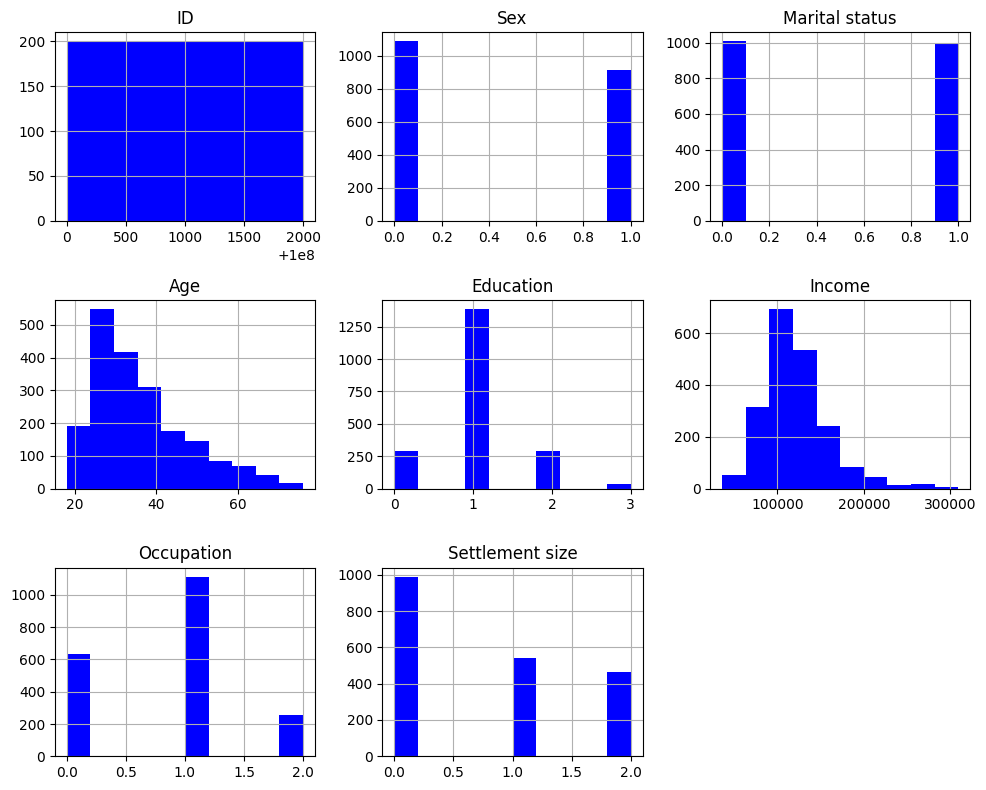

In [13]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

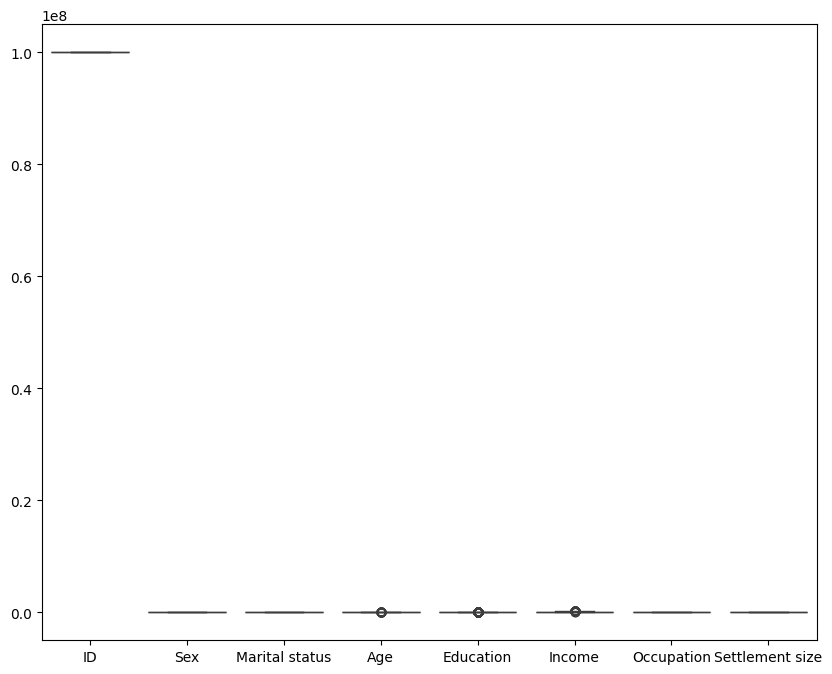

In [14]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

In [15]:
categorical_data = data.select_dtypes(include='object')
for column in categorical_data.columns:
    sns.countplot(data=categorical_data, x=column, palette="Set1")
    plt.title(f"Countplot of {column}")
    plt.show()

**Multivariate Analysis**

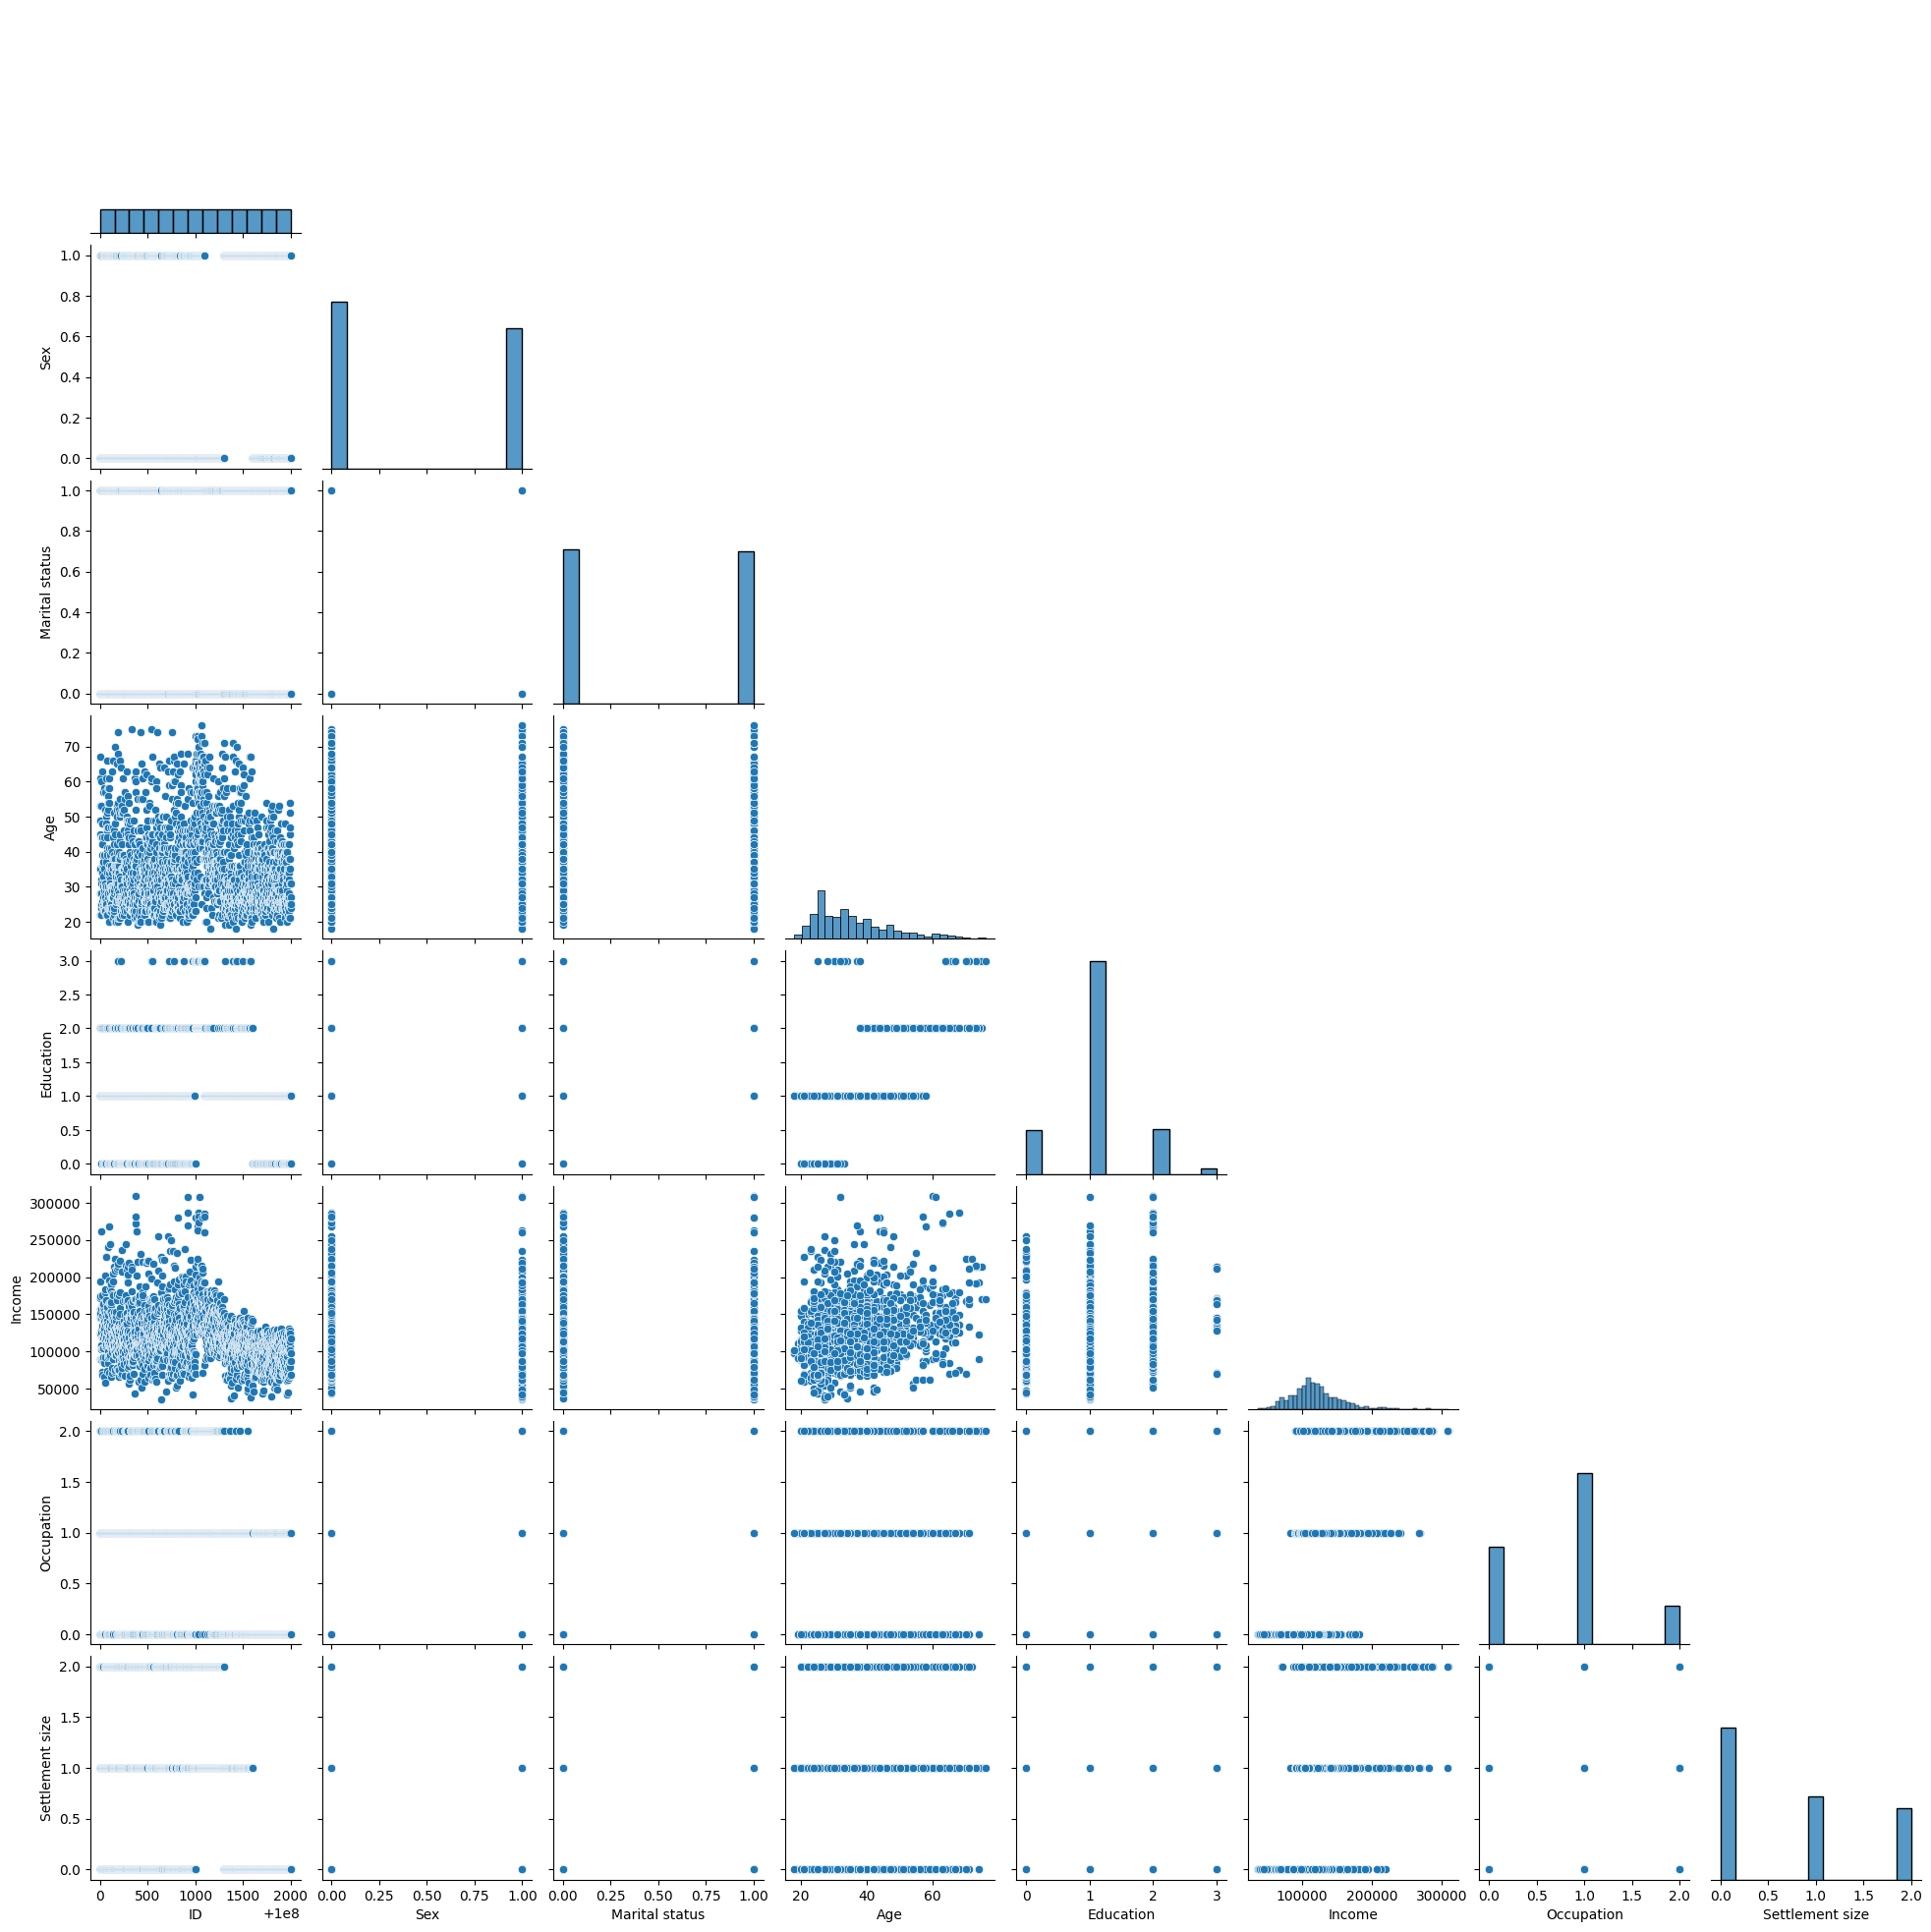

In [21]:
sns.pairplot(data.select_dtypes(include='number'),corner=True)
plt.show()

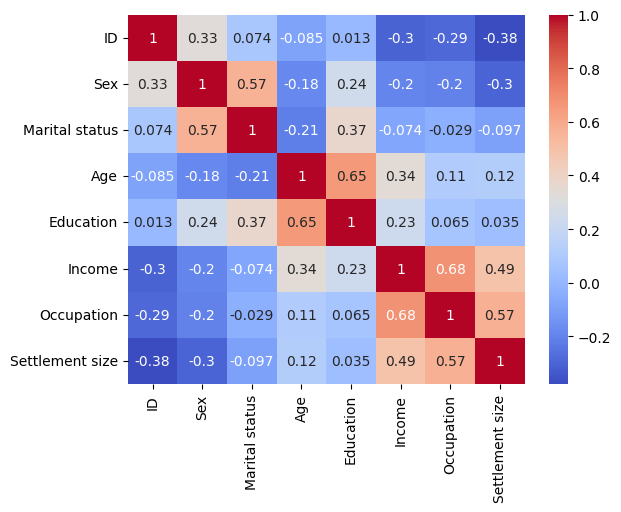

In [17]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Data Cleaning**
---

In [31]:
data = data.drop('ID',axis = 1)

**Handling Duplicate Rows**

In [18]:
data.duplicated().sum()

0

In [19]:
data.drop_duplicates()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


**Handling Missing Data**

In [24]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
ID,0,0.0
Sex,0,0.0
Marital status,0,0.0
Age,0,0.0
Education,0,0.0
Income,0,0.0
Occupation,0,0.0
Settlement size,0,0.0


In [25]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


# **Modelling**

In [108]:
X = data

In [128]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans , DBSCAN , AgglomerativeClustering

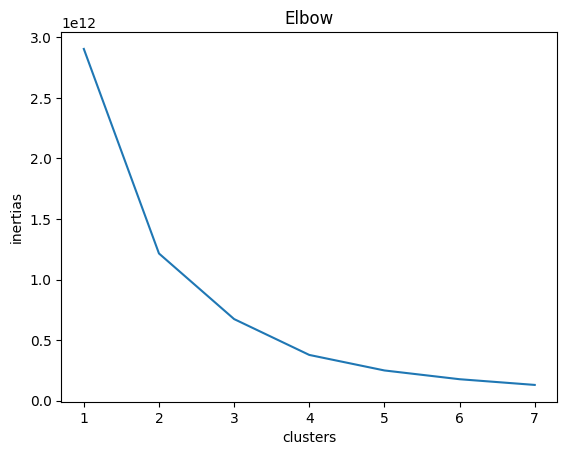

In [135]:
ilist = []
n = 8
for i in range(1,n):
    kmeans =  KMeans(n_clusters=i,random_state=33)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)

plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

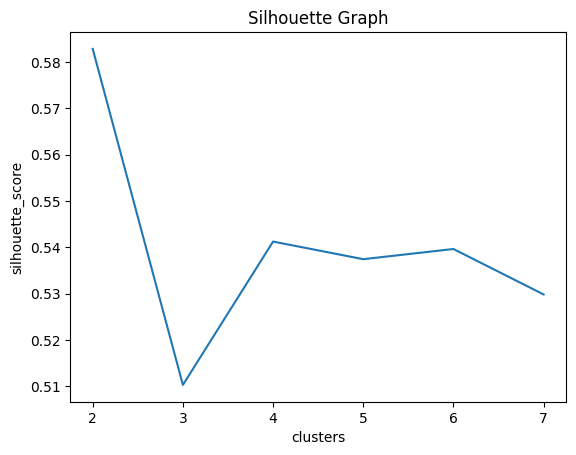

In [140]:
ilist = []
n = 8
for i in range(2,n):
    kmeans =  KMeans(n_clusters=i,random_state=33)
    kmeans.fit(X)
    label = kmeans.labels_
    ilist.append(silhouette_score(X,label))

plt.plot(range(2,n), ilist)
plt.title('Silhouette Graph')
plt.xlabel('clusters')
plt.ylabel('silhouette_score')
plt.show()

In [154]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

algorithms = [
    ('KMeans', KMeans(n_clusters=4, random_state=33)),
    ('Agglomerative', AgglomerativeClustering(n_clusters=4))
]

for name, algorithm in algorithms:
    labels = algorithm.fit_predict(X)

    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f"Algorithm: {name}")
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")
    print('------------------------------------------------------')


Algorithm: KMeans
Silhouette Score: 0.5413
Davies-Bouldin Index: 0.5406
Calinski-Harabasz Index: 4449.4160
------------------------------------------------------
Algorithm: Agglomerative
Silhouette Score: 0.4636
Davies-Bouldin Index: 0.5575
Calinski-Harabasz Index: 3593.6058
------------------------------------------------------


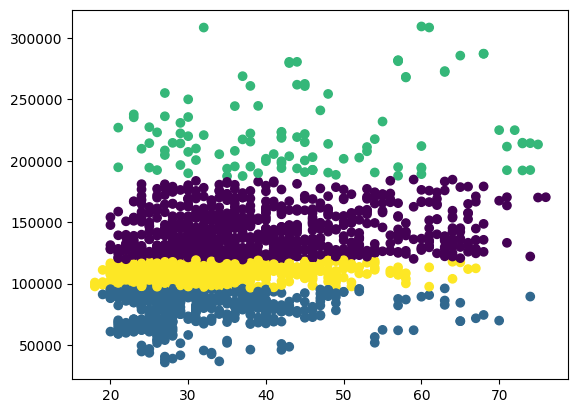

In [155]:
plt.scatter(x='Age',y='Income',c=labels,data=data)
plt.show()

----------------------------------------------------------